In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df = pd.read_csv("Toddler_Autism_dataset_July_2018.csv")

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

In [51]:
df = df.rename(columns = {'Class/ASD Traits ' : 'ASD'})
df = df.rename(columns = {'A1' : 'Q1'})
df = df.rename(columns = {'A2' : 'Q2'})
df = df.rename(columns = {'A3' : 'Q3'})
df = df.rename(columns = {'A4' : 'Q4'})
df = df.rename(columns = {'A5' : 'Q5'})
df = df.rename(columns = {'A6' : 'Q6'})
df = df.rename(columns = {'A7' : 'Q7'})
df = df.rename(columns = {'A8' : 'Q8'})
df = df.rename(columns = {'A9' : 'Q9'})
df = df.rename(columns = {'A10' : 'Q10'})
df = df.rename(columns = {'Age_Mons' : 'Age in Months'})
df = df.rename(columns = {'Sex' : 'Gender'})
df = df.rename(columns = {'Qchat-10-Score' : 'Score out of 10'})
df = df.rename(columns = {'Ethnicity' : 'Region'})
df

,Case_No,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Age in Months,Score out of 10,Gender,Region,Jaundice,Family_mem_with_ASD,Who completed the test,ASD
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,1050,0,0,0,0,0,0,0,0,0,1,24,1,f,White European,no,yes,family member,No
1050,1051,0,0,1,1,1,0,1,0,1,0,12,5,m,black,yes,no,family member,Yes
1051,1052,1,0,1,1,1,1,1,1,1,1,18,9,m,middle eastern,yes,no,family member,Yes
1052,1053,1,0,0,0,0,0,0,1,0,1,19,3,m,White European,no,yes,family member,No


In [52]:
x = df.drop('Case_No' , axis = 1)
x = x.drop('ASD', axis = 1)
y = df['ASD']

In [53]:
x.shape, y.shape

((1054, 17), (1054,))

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 36)

In [55]:
obj_cols = x_train.select_dtypes(include = 'object').columns
obj_cols

Index(['Gender', 'Region', 'Jaundice', 'Family_mem_with_ASD',
       'Who completed the test'],
      dtype='object')

In [56]:
float_cols = x_train.select_dtypes(include = 'int64').columns
float_cols

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10',
       'Age in Months', 'Score out of 10'],
      dtype='object')

In [57]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(y_train)

LabelEncoder()

In [58]:
y_train_processed = le.transform(y_train)
y_test_processed = le.transform(y_test)

In [59]:
y_train_processed

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,

In [60]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories = [x_train[i].unique() for i in obj_cols])
oe.fit(x_train[obj_cols])
x_train_cat_encoded = oe.transform(x_train[obj_cols])
x_test_cat_encoded = oe.transform(x_test[obj_cols])

In [61]:
x_train_cat_encoded

array([[0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0.]])

In [62]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train[float_cols])

x_train_float_encoded = scaler.transform(x_train[float_cols])
x_test_float_encoded = scaler.transform(x_test[float_cols])

In [63]:
x_train_float_encoded

array([[0.        , 1.        , 0.        , ..., 1.        , 0.70833333,
        0.5       ],
       [1.        , 1.        , 1.        , ..., 0.        , 1.        ,
        0.8       ],
       [1.        , 1.        , 0.        , ..., 1.        , 0.125     ,
        0.7       ],
       ...,
       [1.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.4       ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.75      ,
        0.6       ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.5       ,
        0.5       ]])

In [64]:
x_train_processed = np.hstack((x_train_cat_encoded, x_train_float_encoded))
x_test_processed = np.hstack((x_test_cat_encoded, x_test_float_encoded))

In [65]:
feature_names = np.concatenate([obj_cols, float_cols])

In [66]:
x_train_final = pd.DataFrame(x_train_processed, columns = feature_names)

In [67]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train_processed, y_train_processed)
y_pred = lr.predict(x_test_processed)
print(accuracy_score(y_test_processed, y_pred))
print(confusion_matrix(y_test_processed, y_pred))

1.0
[[ 66   0]
 [  0 145]]


In [68]:
le.inverse_transform([0,1])

array(['No', 'Yes'], dtype=object)

In [69]:
def pretty_confusion_matrix(y_test, y_pred, labels = ['Not_Diagnosed_with_ASD', 'Diagnosed_with_ASD']):
    cm = confusion_matrix(y_test, y_pred)
    pred_labels = ['Predicted ' + i for i in labels]
    df = pd.DataFrame(cm, columns = pred_labels, index = labels)
    return df

In [70]:
results_plot = pretty_confusion_matrix(y_test_processed, y_pred, ['Not_Diagnosed_with_ASD', 'Diagnosed_with_ASD'])
results_plot

,Predicted Not_Diagnosed_with_ASD,Predicted Diagnosed_with_ASD
Not_Diagnosed_with_ASD,66,0
Diagnosed_with_ASD,0,145


<AxesSubplot:>

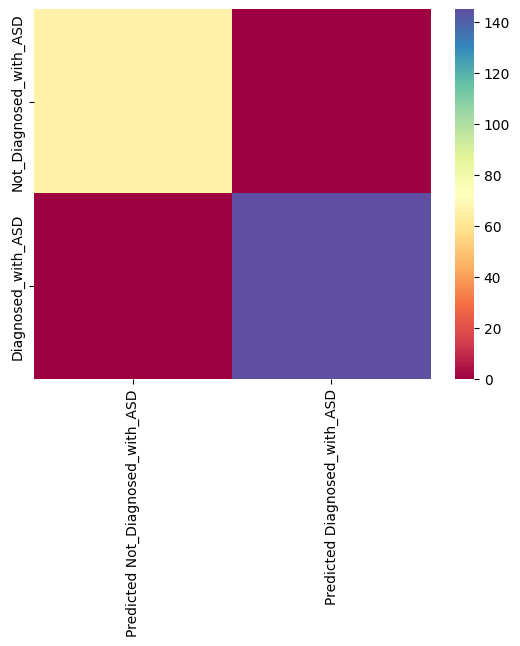

In [71]:
sns.heatmap(results_plot, cmap = 'Spectral')

In [72]:
lr.coef_

array([[-0.14901906, -0.04064787,  0.50390564, -0.17946135, -0.09388453,
         2.24075121,  2.55477819,  1.99292749,  2.21891284,  2.14127321,
         2.2604061 ,  2.27357885,  2.45267117,  2.5931873 ,  2.07729313,
         0.04767249,  2.28057795]])

In [73]:
# Match coef's of features to columns
feature_dict = dict(zip(x.columns, list(lr.coef_[0])))
feature_dict

{'Q1': -0.14901905604158747,
 'Q2': -0.040647866357813374,
 'Q3': 0.5039056422324233,
 'Q4': -0.1794613498814446,
 'Q5': -0.09388452964661367,
 'Q6': 2.2407512146573874,
 'Q7': 2.554778192857463,
 'Q8': 1.9929274920302145,
 'Q9': 2.218912837999508,
 'Q10': 2.1412732064710185,
 'Age in Months': 2.2604060995560724,
 'Score out of 10': 2.2735788503627075,
 'Gender': 2.4526711677311486,
 'Region': 2.593187295022191,
 'Jaundice': 2.0772931343216183,
 'Family_mem_with_ASD': 0.0476724939179229,
 'Who completed the test': 2.280577949100932}

<AxesSubplot:title={'center':'Feature Importance'}>

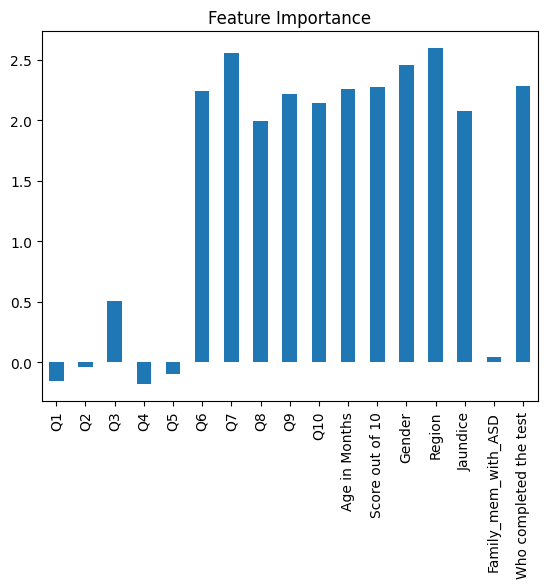

In [74]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
# plt.style.use('dark_background')
feature_df.T.plot.bar(title="Feature Importance", legend=False)

Text(0.5, 1.0, 'Age Distribution')

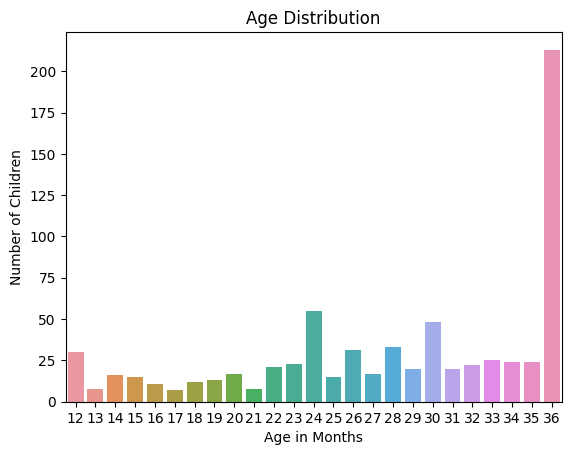

In [75]:
yes_autism = df[df['ASD'] == 'Yes']
ax = plt.subplot()
# plt.style.use('dark_background')
sns.countplot(x = "Age in Months", data = yes_autism)
ax.set_ylabel('Number of Children')
ax.set_title('Age Distribution')

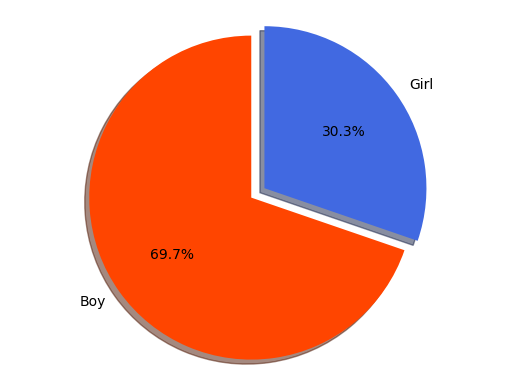

In [76]:
fig = plt.gcf()
plt.pie(x['Gender'].value_counts(), labels = ('Boy','Girl'), explode = [0.1, 0], autopct='%1.1f%%', shadow = True, startangle = 90,
        colors = ['orangered', 'royalblue'])
plt.axis('equal')
plt.show()